In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, plot_confusion_matrix, accuracy_score, confusion_matrix

In [84]:
df = pd.read_csv('estonia-passenger-list.csv')

In [70]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [71]:
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

Text(0.5, 1.0, 'Number of passengers by country')

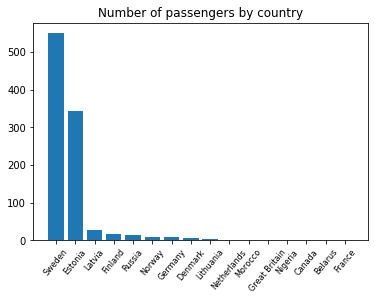

In [72]:
#number of passengers by country
data= df['Country'].value_counts().reset_index()
data.columns = ['Country', 'number of passengers']
plt.bar(data['Country'], data['number of passengers'])
plt.xticks(size = 8, rotation=50)
plt.title('Number of passengers by country')

Text(0.5, 1.0, 'Number of passengers by Sex')

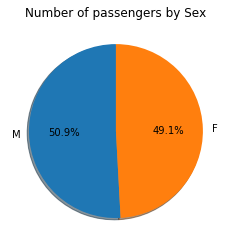

In [73]:
data = df['Sex'].value_counts().reset_index()
data.columns = ['Sex', 'number of passengers']
plt.pie(data['number of passengers'], labels= data['Sex'], autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title('Number of passengers by Sex')

Text(0.5, 1.0, 'Number of passengers by Category')

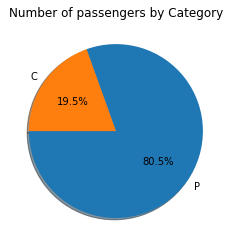

In [74]:
data = df['Category'].value_counts().reset_index()
data.columns = ['Category', 'number of passengers']
plt.pie(data['number of passengers'], labels= data['Category'], autopct='%.1f%%',
        shadow=True, startangle=180)
plt.title('Number of passengers by Category')


Text(0.5, 1.0, 'Survived passengers')

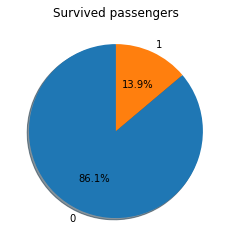

In [75]:
data = df['Survived'].value_counts().reset_index()
data.columns = ['Survived', 'number of passengers']
plt.pie(data['number of passengers'], labels= data['Survived'], autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title('Survived passengers')

Text(0.5, 1.0, 'Age distribution of passengers')

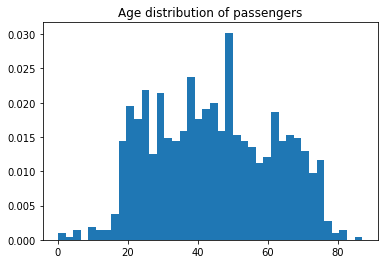

In [76]:
plt.hist(df['Age'], bins= 40, density= True)
plt.title('Age distribution of passengers')

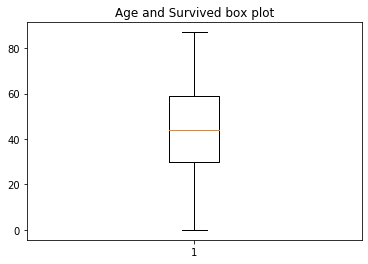

In [77]:
data = df[['Age', 'Survived']]
plt.boxplot(data['Age'])
plt.title('Age and Survived box plot')
plt.show()

In [100]:
X = df[['Country', 'Sex', 'Age', 'Category', 'Survived']]
categorical = ['Country', 'Sex', 'Category']
for cat in categorical:
    X = pd.concat([X, pd.get_dummies(X[cat], prefix=cat)], axis=1)
    X = X.drop([cat], axis=1)
X = X.drop(['Sex_F', 'Category_C'], axis=1)
X

,Age,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden,Sex_M,Category_P
0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
985,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
986,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
987,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

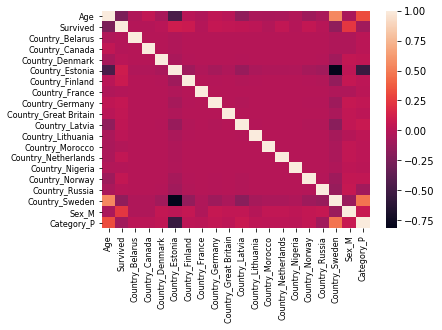

In [101]:
sns.heatmap(X.corr())
plt.colorbar
plt.xticks(size = 8)
plt.yticks(size = 8)
#X.corr()

In [102]:
for col in X.columns:
    if abs(X[col].corr(X['Survived'])) < 0.1:
        X = X.drop([col], axis=1)

In [105]:
y = X['Survived']
X = X.drop(['Survived'], axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= 0.2, shuffle = False)

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_predicted= model.predict(X_test)

In [127]:
print ('accuracy score: ', accuracy_score(y_test, y_predicted))

accuracy score:  0.8282828282828283


In [128]:
confusion_matrix(y_test, y_predicted)

array([[164,   1],
       [ 33,   0]], dtype=int64)

In [129]:
print ('f1 score: ', f1_score(y_test, y_predicted))
print('Logistic Regression precision', precision_score(y_test, y_predicted))
print('Logistic Regression recall', recall_score(y_test, y_predicted))

f1 score:  0.0
Logistic Regression precision 0.0
Logistic Regression recall 0.0


In [130]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [131]:
y_predicted= model.predict(X_test)

In [132]:
confusion_matrix(y_test, y_predicted)

array([[156,   9],
       [ 25,   8]], dtype=int64)

In [133]:
print ('f1 score: ', f1_score(y_test, y_predicted))
print('RandomForest precision', precision_score(y_test, y_predicted))
print('RandomForest recall', recall_score(y_test, y_predicted))

f1 score:  0.32
RandomForest precision 0.47058823529411764
RandomForest recall 0.24242424242424243
